In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

pd.set_option("display.max_rows", 20)
STEM = pd.read_csv(r"C:\Users\Angela\Desktop\COMP 3625\Levels_Fyi_Salary_Data.csv")
print(STEM.shape)
print("The STEM salaries dataset has {} rows and {} columns.".format(STEM.shape[0], STEM.shape[1]))

(62642, 19)
The STEM salaries dataset has 62642 rows and 19 columns.


In [2]:
STEM.head

<bound method NDFrame.head of              timestamp     company     level                         title  \
0       6/7/2017 11:33      Oracle        L3               Product Manager   
1      6/10/2017 17:11        eBay      SE 2             Software Engineer   
2      6/11/2017 14:53      Amazon        L7               Product Manager   
3       6/17/2017 0:23       Apple        M1  Software Engineering Manager   
4      6/20/2017 10:58   Microsoft        60             Software Engineer   
...                ...         ...       ...                           ...   
62637   9/9/2018 11:52      Google        T4             Software Engineer   
62638   9/13/2018 8:23   Microsoft        62             Software Engineer   
62639  9/13/2018 14:35        MSFT        63             Software Engineer   
62640  9/16/2018 16:10  Salesforce  Lead MTS             Software Engineer   
62641   1/29/2019 5:12       apple      ict3             Software Engineer   

       totalyearlycompensation   

In [3]:
for col in STEM.columns:
    print(col)

timestamp
company
level
title
totalyearlycompensation
location
yearsofexperience
yearsatcompany
tag
basesalary
stockgrantvalue
bonus
gender
otherdetails
cityid
dmaid
rowNumber
Race
Education


In [4]:
print(STEM.dtypes)

timestamp                   object
company                     object
level                       object
title                       object
totalyearlycompensation      int64
location                    object
yearsofexperience          float64
yearsatcompany             float64
tag                         object
basesalary                   int64
stockgrantvalue            float64
bonus                      float64
gender                      object
otherdetails                object
cityid                       int64
dmaid                      float64
rowNumber                    int64
Race                        object
Education                   object
dtype: object


In [8]:
print(type(STEM))
print(type(STEM.company))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [10]:
STEM.company

0            Oracle
1              eBay
2            Amazon
3             Apple
4         Microsoft
            ...    
62637        Google
62638     Microsoft
62639          MSFT
62640    Salesforce
62641         apple
Name: company, Length: 62642, dtype: object

In [79]:
iris.SepalLengthCm

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: SepalLengthCm, Length: 150, dtype: float64

In [80]:
iris.SepalLengthCm.describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: SepalLengthCm, dtype: float64

In [81]:
iris.Species.describe()

count                 150
unique                  3
top       Iris-versicolor
freq                   50
Name: Species, dtype: object

In [82]:
print(type(iris.Species.value_counts()))
iris.Species.value_counts()

<class 'pandas.core.series.Series'>


Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

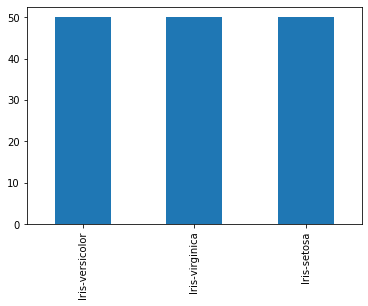

In [83]:
iris.Species.value_counts().plot(kind="bar")

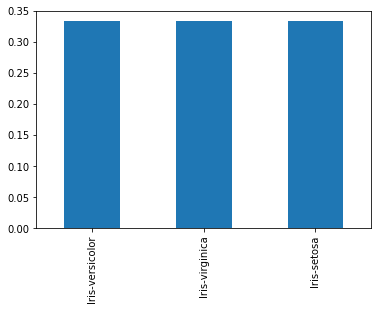

In [84]:
iris.Species.value_counts(normalize="true").plot(kind="bar")

In [85]:
pd.crosstab(iris.Species,iris.SepalLengthCm)

SepalLengthCm,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,5.1,5.2,...,6.8,6.9,7.0,7.1,7.2,7.3,7.4,7.6,7.7,7.9
Species,,,,,,,,,,,,,,,,,,,,,
Iris-setosa,1,3,1,4,2,5,4,8,8,3,...,0,0,0,0,0,0,0,0,0,0
Iris-versicolor,0,0,0,0,0,0,1,2,1,1,...,1,1,1,0,0,0,0,0,0,0
Iris-virginica,0,0,0,0,0,0,1,0,0,0,...,2,3,0,1,3,1,1,1,4,1


In [86]:
pd.qcut(iris['SepalLengthCm'], q=3) #splits into 3 parts

0      (4.2989999999999995, 5.4]
1      (4.2989999999999995, 5.4]
2      (4.2989999999999995, 5.4]
3      (4.2989999999999995, 5.4]
4      (4.2989999999999995, 5.4]
                 ...            
145                   (6.3, 7.9]
146                   (5.4, 6.3]
147                   (6.3, 7.9]
148                   (5.4, 6.3]
149                   (5.4, 6.3]
Name: SepalLengthCm, Length: 150, dtype: category
Categories (3, interval[float64]): [(4.2989999999999995, 5.4] < (5.4, 6.3] < (6.3, 7.9]]

In [87]:
iris['3_bin'] = pd.qcut(iris['SepalLengthCm'], q=3)
iris['5_bin'] = pd.qcut(iris['SepalLengthCm'], q=5)
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,3_bin,5_bin
0,1,5.1,3.5,1.4,0.2,Iris-setosa,"(4.2989999999999995, 5.4]","(5.0, 5.6]"
1,2,4.9,3.0,1.4,0.2,Iris-setosa,"(4.2989999999999995, 5.4]","(4.2989999999999995, 5.0]"
2,3,4.7,3.2,1.3,0.2,Iris-setosa,"(4.2989999999999995, 5.4]","(4.2989999999999995, 5.0]"
3,4,4.6,3.1,1.5,0.2,Iris-setosa,"(4.2989999999999995, 5.4]","(4.2989999999999995, 5.0]"
4,5,5.0,3.6,1.4,0.2,Iris-setosa,"(4.2989999999999995, 5.4]","(4.2989999999999995, 5.0]"


In [88]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,3_bin,5_bin
145,146,6.7,3.0,5.2,2.3,Iris-virginica,"(6.3, 7.9]","(6.52, 7.9]"
146,147,6.3,2.5,5.0,1.9,Iris-virginica,"(5.4, 6.3]","(6.1, 6.52]"
147,148,6.5,3.0,5.2,2.0,Iris-virginica,"(6.3, 7.9]","(6.1, 6.52]"
148,149,6.2,3.4,5.4,2.3,Iris-virginica,"(5.4, 6.3]","(6.1, 6.52]"
149,150,5.9,3.0,5.1,1.8,Iris-virginica,"(5.4, 6.3]","(5.6, 6.1]"


In [89]:
iris['5_bin'].value_counts()

(5.0, 5.6]                   33
(4.2989999999999995, 5.0]    32
(6.52, 7.9]                  30
(5.6, 6.1]                   30
(6.1, 6.52]                  25
Name: 5_bin, dtype: int64

In [90]:
cat_bins = ['Small', 'Medium', 'Large']
iris['sepal_bins'] = pd.qcut(iris['SepalLengthCm'], q=[0,0.4,0.8,1], labels=cat_bins)
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,3_bin,5_bin,sepal_bins
0,1,5.1,3.5,1.4,0.2,Iris-setosa,"(4.2989999999999995, 5.4]","(5.0, 5.6]",Small
1,2,4.9,3.0,1.4,0.2,Iris-setosa,"(4.2989999999999995, 5.4]","(4.2989999999999995, 5.0]",Small
2,3,4.7,3.2,1.3,0.2,Iris-setosa,"(4.2989999999999995, 5.4]","(4.2989999999999995, 5.0]",Small
3,4,4.6,3.1,1.5,0.2,Iris-setosa,"(4.2989999999999995, 5.4]","(4.2989999999999995, 5.0]",Small
4,5,5.0,3.6,1.4,0.2,Iris-setosa,"(4.2989999999999995, 5.4]","(4.2989999999999995, 5.0]",Small


In [91]:
iris.sepal_bins.value_counts()

Small     65
Medium    55
Large     30
Name: sepal_bins, dtype: int64

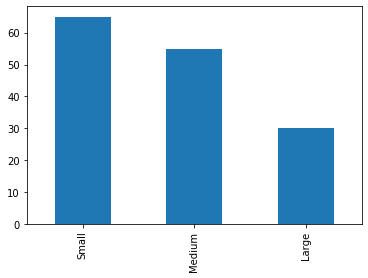

In [92]:
iris.sepal_bins.value_counts().plot(kind="bar")

In [93]:
pd.crosstab(iris.Species,iris.sepal_bins)

sepal_bins,Small,Medium,Large
Species,,,
Iris-setosa,47,3,0
Iris-versicolor,16,26,8
Iris-virginica,2,26,22


In [94]:
# Feature selection
#split dataset in features and target variable
#SepalLengthCm
#SepalWidthCm
#PetalLengthCm
#PetalWidthCm
#Species
feature_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = iris[feature_cols] # Features
y = iris.Species # Target variable

In [95]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [96]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [97]:
print("X_train = ", X_train.shape, "X_test= ", X_test.shape, "y_train = ", y_train.shape, "y_test = ", y_test.shape)

X_train =  (105, 4) X_test=  (45, 4) y_train =  (105,) y_test =  (105,)


In [98]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
118,7.7,2.6,6.9,2.3
18,5.7,3.8,1.7,0.3
4,5.0,3.6,1.4,0.2
45,4.8,3.0,1.4,0.3
59,5.2,2.7,3.9,1.4


In [99]:
y_train.head()

118     Iris-virginica
18         Iris-setosa
4          Iris-setosa
45         Iris-setosa
59     Iris-versicolor
Name: Species, dtype: object

In [100]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

In [101]:
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [102]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [103]:
# 1, 4,4,4,4 
# SepalLengthCm
# SepalWidthCm
# PetalLengthCm
# PetalWidthCm
t = {'SepalLengthCm':[1], 'SepalWidthCm':[1], 'PetalLengthCm':[4], 'PetalWidthCm':[4]}
trythis = pd.DataFrame(data=t)
trythis


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,1,4,4


In [104]:
trypred = clf.predict(trythis)
trypred

array(['Iris-virginica'], dtype=object)

In [105]:
# how good is it? 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


In [106]:
y_test

14         Iris-setosa
98     Iris-versicolor
75     Iris-versicolor
16         Iris-setosa
131     Iris-virginica
            ...       
112     Iris-virginica
17         Iris-setosa
119     Iris-virginica
103     Iris-virginica
58     Iris-versicolor
Name: Species, Length: 45, dtype: object

In [107]:
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

In [108]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]], dtype=int64)

By definition a confusion matrix $C$ is such that $C_{i,j}$ is equal to the number of observations known to be in group $i$ and predicted to be in group $j$

In [109]:
sp=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
confusion_matrix(y_test,y_pred, labels=sp)

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]], dtype=int64)

In [110]:
dazed = pd.DataFrame(
    confusion_matrix(y_test, y_pred, labels=sp), 
    index=['true:setosa', 'true:versicolor', 'true:virginica'], 
    columns=['pred:setosa', 'pred:versicolo', 'pred:virginica']
)
print(dazed)

                 pred:setosa  pred:versicolo  pred:virginica
true:setosa               14               0               0
true:versicolor            0              17               1
true:virginica             0               1              12


In [111]:
New = pd.DataFrame({'SepalLengthCm': [7,4.8, 3.2], 
                   'SepalWidthCm': [7, 4.0, 3.5], 
                   'PetalLengthCm': [7,1.4,1.6], 
                   'PetalWidthCm': [7,0.5,0.5]})
New

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,7.0,7.0,7.0,7.0
1,4.8,4.0,1.4,0.5
2,3.2,3.5,1.6,0.5


In [112]:
trypred = clf.predict(New)
trypred

array(['Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)